## Week 1. HW

김정규

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.special import beta as beta_fn

### Problem1

In [2]:
def likelihood(theta, n, y):
    return (theta**y)*(1-theta)**(n-y)

def get_prior(omega, kappa):
    def alpha(omega, kappa):
        return omega * (kappa-2) + 1
    def beta(omega, kappa):
        return (1-omega) * (kappa - 2) + 1
    return (alpha(omega, kappa), beta(omega, kappa))

def get_posterior(a0, b0, n, y):
    return st.beta(a=a0+n, b=b0+(n-y))

# plotting
def do_plotting( prior, data_likelihood, post, thetas, axs): 
    axs.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
    axs.plot(thetas, data_likelihood, label='Likelihood', c='orange')
    axs.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
    axs.legend();

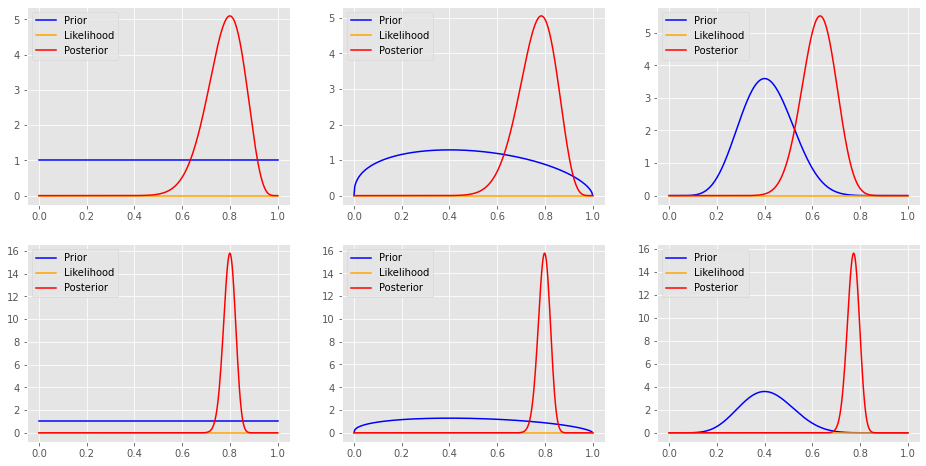

In [3]:
# thetas
thetas = np.linspace(0, 1, 300)

# Prior
omega = 0.4
kappa1 = 3
kappa2 = 20

uniform_prior = (1,1)
weak_prior = get_prior(omega, kappa1)
strong_prior = get_prior(omega, kappa2)

# data
data_strong = (200, 150)
data_weak = (20, 15)

#Posterior
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
pos_x = 0; pos_y = 0 
for priors in [uniform_prior, weak_prior, strong_prior]:
    for dat in [data_weak, data_strong]:
        prior = st.beta(*priors)
        data_likelihood = likelihood(thetas, *dat)
        posterior = get_posterior(*priors, *dat)
        do_plotting(prior, data_likelihood, posterior, thetas, axs[pos_x, pos_y])
        pos_x += 1
    pos_y += 1
    pos_x = 0

### Problem 3

#### 3.a

In [4]:
omega = 0.9 # given
threshold = 0.99 # set by user
kappa=2  # a + b >= 2
coverage = 0 # initial condition

# empirically obtain alpha
while (coverage <= threshold):
    alpha, beta = get_prior(omega, kappa )
    alpha, beta = round(alpha), round(beta)
    coverage = st.beta.cdf(0.97, alpha, beta) - st.beta.cdf(0.80, alpha, beta) 
    kappa += 1 

print("Coverage: ", coverage)
print(f"Alpha:{alpha}, Beta:{beta}")

Coverage:  0.9902192256878711
Alpha:75, Beta:9


#### 3.b.

In [5]:
n = 10
y = 10
alpha_new = alpha + y
beta_new = beta + n - y
posterior_distn = st.beta(alpha_new, beta_new )

#### 3.c

In [6]:
p3_c_1 = posterior_distn.mean()
print(p3_c_1)

0.9042553191489362


In [7]:
p3_c_2 = 1 - (1/beta_fn(alpha_new, beta_new))*(beta_fn(20+alpha_new, beta_new) + 20 * beta_fn(19 + alpha_new, beta_new + 1))
print(p3_c_2)

0.5600456042741397
